In [2]:
#import packages and record dataset
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_path = '../../data/cleaned_riot_data/league_combined_with_chall_cleaned.csv'
combined_league_ranks = pd.read_csv(data_path, index_col=None)

In [3]:
"""
Simple cleaning to transform time-dependent features and removing unneeded features.
"""

#normalize time-dependent features
#do this for variables: kills, deaths, dmgObj, dmgTurr, vision_score, totalDmg, 
#totalDmgTaken, totalMinions, and gold
combined_league_ranks['kills/min'] = combined_league_ranks['kills']/combined_league_ranks['time']
combined_league_ranks['deaths/min'] = combined_league_ranks['deaths']/combined_league_ranks['time']
combined_league_ranks['dmgObj/min'] = combined_league_ranks['dmgObj']/combined_league_ranks['time']
combined_league_ranks['dmgTurr/min'] = combined_league_ranks['dmgTurr']/combined_league_ranks['time']
combined_league_ranks['vision_score/min'] = combined_league_ranks['vision_score']/combined_league_ranks['time']
combined_league_ranks['dmg/min'] = combined_league_ranks['totalDmg']/combined_league_ranks['time']
combined_league_ranks['dmgTaken/min'] = combined_league_ranks['totalDmgTaken']/combined_league_ranks['time']
combined_league_ranks['minions/min'] = combined_league_ranks['totalMinions']/combined_league_ranks['time']
combined_league_ranks['gold/min'] = combined_league_ranks['gold']/combined_league_ranks['time']


#remove the time-dependent columns
combined_league_ranks = combined_league_ranks.drop('kills', axis=1)
combined_league_ranks = combined_league_ranks.drop('deaths', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgObj', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgTurr', axis=1)
combined_league_ranks = combined_league_ranks.drop('vision_score', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmg', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmgTaken', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalMinions', axis=1)
combined_league_ranks = combined_league_ranks.drop('gold', axis=1)

#remove non-numerical columns and time columns
combined_league_ranks = combined_league_ranks.drop('time', axis=1)
combined_league_ranks = combined_league_ranks.drop('position', axis=1)
combined_league_ranks = combined_league_ranks.drop('win', axis=1)

#remove temporarily the class label column "rank" to add to later
rank_col = combined_league_ranks.pop("rank")

In [4]:
"""
Subset features 5 and 8 (vision_score/min and minions/min) from dataset for later.
"""

subset_combined = combined_league_ranks[['vision_score/min', 'minions/min']]

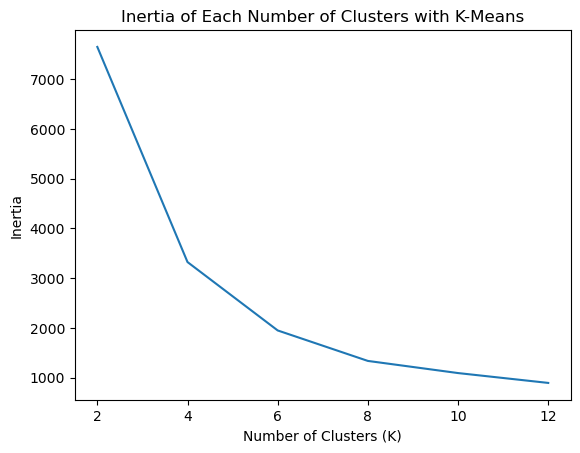

In [5]:
"""
Not fit and transform the dataset with K-Means Clustering with multiple clusters.
With different clusters, find the inertia in each case and plot it.
Use elbow method to determine what is the optimal number of clusters to use.

Use features that I found were optimal from feature selection (features 5 and 8)
"""
#how many clusters will be initialized for k-means clustering
clusters = [2,4,6,8,10,12]
inertias = []

#run through each number of clusters
for num in clusters:
    
    #define each KMeans clustering
    km = KMeans(n_clusters=num, random_state=33, n_init='auto') #specify certain seed for reproduceability
    
    #fit  current K-means with dataset
    current_km = km.fit(subset_combined)

    #save the inertia in empty list for plotting
    inertias.append(current_km.inertia_)

plt.plot(clusters, inertias)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia of Each Number of Clusters with K-Means')

#save as .png
plt.savefig('kmean_inertia.png', bbox_inches='tight')

plt.show()

# With K-Means clustering, we want to minimize the inertia of clusters.
# 4 Clusters seemed to work the best as it starts to diminish the rate of decrease
# at 4 clusters.

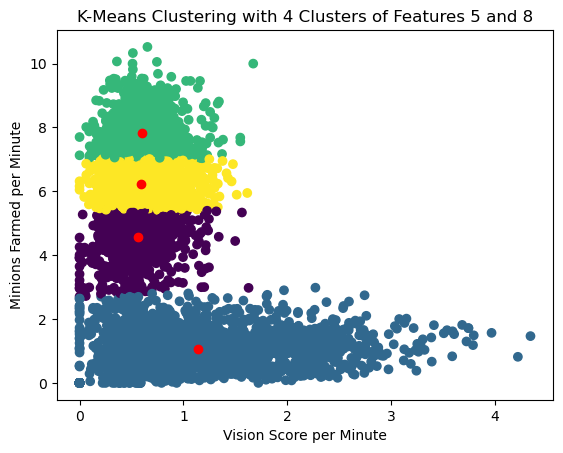

In [6]:
"""
Now knowing that 4 clusters is the optimal number of clusters to use for k-means,
it is time to visualize the clustering.

Since its hard to visualize with many features, I will use features 5 and 8 that
I found in feature selection for clustering.
"""

#apply optimal param n_clusters = 4
km_3 = KMeans(n_clusters=4, random_state=33, n_init='auto')
#now fit and predict clusters
km_3_predict = km_3.fit_predict(subset_combined)
#not scatterplot of the two features
plt.scatter(subset_combined['vision_score/min'], subset_combined['minions/min'], c=km_3_predict)
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1], c='red')
#labels
plt.title('K-Means Clustering with 4 Clusters of Features 5 and 8')
plt.xlabel('Vision Score per Minute')
plt.ylabel('Minions Farmed per Minute')

#save as .png
plt.savefig('kmean_cluster.png', bbox_inches='tight')

plt.show()